#### 9.03.24, &copy; [Marikov Artem](https://github.com/ScarlettTheBrave), 2024

# Лабораторна робота 2. Побудова лінійного бінарного класифікатора на основі оптимізації функціонала якості

__Мета:__ _реалізувати бінарний класифікатор на основі оптимізації функціонала якості засобами мови Python._

### Завдання для самостійної роботи
1. Імпортувати дані для навчальної вибірки згідно з індивідуальним варіантом (імпорт організувати з файлу).
2. Побудувати бінарний МНК-класифікатор згідно з розглянутим вище прикладом і вивести результати бінарної класифікації на графіку.
3. Проаналізувати отримані результати і порівняти їх з результатами, отриманими у лаб роб. 1.
4. Дати відповіді на контрольні запитання.
5. Відправити результати роботи у файлі lab_2_StudentLastName.ipynb до віддаленого репозиторію на GіtHub.

### Хід роботи

[-0.02152218 -0.0140097   0.84658639]


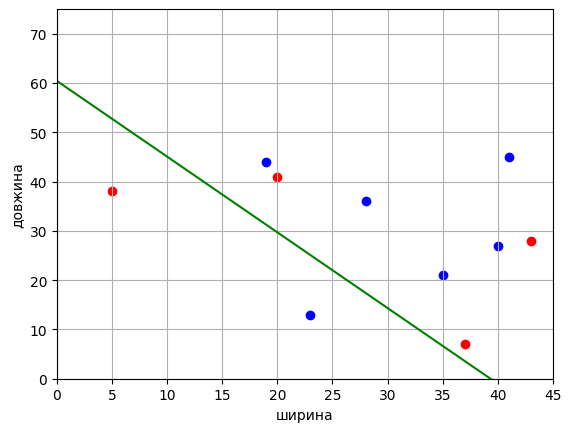

In [1]:
import numpy as np
import matplotlib.pyplot as plt

array_x = []
array_y = []
filename = 'data.txt'  # Назва вашого файлу
    # Відкриваємо файл для читання
with open(filename, 'r') as file:
    for line in file:
        values = line.strip().split()
        row = [int(value) for value in values]
        if len(row) == 2:
            array_x.append(row)
        else:
            array_y = row
            
array_x = [x + [1] for x in array_x]  # Додаємо зміщення для кожного прикладу            
x_train = np.array(array_x)
y_train = np.array(array_y)

pt = np.sum([x * y for x, y in zip(x_train, y_train)], axis=0)  # Обчислення підсумку
xxt = np.sum([np.outer(x, x) for x in x_train], axis=0)  # Обчислення підсумку зовнішнього добутку
w = np.dot(pt, np.linalg.inv(xxt))  # Обчислення вагових коефіцієнтів
print(w)

line_x = list(range(max(x_train[:, 0])))    # формування координат для лінії розділення
line_y = [-x*w[0]/w[1] - w[2]/w[1] for x in line_x]

x_0 = x_train[y_train == 1]                 # формування точок для класу 1
x_1 = x_train[y_train == -1]                # і класу -1

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')  # відображення точок класу 1 червоним кольором
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')  # відображення точок класу -1 синім кольором
plt.plot(line_x, line_y, color='green')  # відображення лінії розділення зеленим кольором

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("довжина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()

<h2 align="center">Відповіді на контрольні запитання</h2>

#### 1. Що таке відступ (margin) і яка його роль в побудові моделі класифікації?
_-В контексті моделей класифікації, таких як машини опорних векторів (SVM), відстань між роздільною гіперплощиною та найближчими точками даних визначається відступом. У зв’язку з тим, що не всі гіперплощини є однаковими, ця відстань є важливою. З цієї причини вибір гіперплощини з найбільшим відступом є простим і простим методом вибору найкращої гіперплощини._

_Основна мета алгоритму машини опорних векторів полягає в максимізації цього відступу. Чим ширший відступ, тим краща класифікація. Це означає, що модель намагається побудувати роздільну лінію (або гіперплощину в багатовимірному просторі) таким чином, щоб максимізувати відстань між найближчими точками кожного класу._

_Цей відступ є важливим, оскільки він може бути використаний для обмеження загальної помилки класифікатора⁴. Таким чином, відступ допомагає нам побудувати більш стійкі та надійні моделі класифікації._

     
#### 2. Яка роль функції втрат і чому не можна знайти коефіцієнти лінійного класифікатора шляхом безпосереднього розв'язаня задачі оптимізації через знаходження похідної?

_- Функція втрат визначає, наскільки добре модель класифікації працює на зразках навчальних даних;_

_- Оптимізаційна задача полягає в мінімізації цієї функції, тобто виборі коефіцієнтів моделі таким чином, щоб помилки класифікації були якомога меншими;_

_- Часто неможливо знайти аналітичний розв'язок для цієї задачі через складність функції втрат та велику кількість параметрів, тому застосовуються ітераційні методи оптимізації, такі як градієнтний спуск._

#### 3. Чим принципово розрізняється алгоритм, розглянутий у цій роботі від алгоритму, розглянутого у лаб. роб 1?

_Алгоритм, розглянутий у цій роботі, базується на методі найменших квадратів (МНК) для побудови лінійного класифікатора.
У лабораторній роботі 1 розглядалась логістична регресія, яка також є методом класифікації, але використовується інший підхід до побудови моделі та розв'язання оптимізаційної задачі._

#### 4. Вивести математичний вираз для оцінки вектора $\omega$.

_$\omega$ = $$X^T X^{-1} X^T y$$, де_
_$$X$$ матриця ознак (включаючи зміщення) розмірності $$m×(n+1)$$, де $$m$$ - кількість прикладів, а $$n$$ -  кількість ознак;_
_$$y$$ - вектор міток класів розмірності $$m × 1$$_;
_$$w$$ - оцінений вектор коефіцієнтів розмірності $$(n+1)×1$$_.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3b771292-09f5-4cd0-adfb-1b3b61d985cf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>